In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import GLM
from pandas import DataFrame

In [2]:
df = pd.read_table("../flu.tsv")
df

C:\Users\chong\Anaconda3\envs\cdi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,testv,refv,test.year,ref.year,titre,treedist,seqdiff,pos36,pos57,pos74,...,pos160,pos170,pos186,pos187,pos189,pos198,pos215,pos222,pos237,pos273
0,vid|467,vid|177,2006,2006,5.0000,0.00591,0.005607,1,1,1,...,1,1,1,0,1,1,1,1,1,0.0
1,vid|265,vid|177,2006,2006,5.0000,0.02347,0.033742,0,1,1,...,1,1,1,0,1,1,1,1,1,1.0
2,vid|453,vid|177,2007,2006,5.0000,0.01994,0.014953,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
3,vid|127,vid|177,2008,2006,2.0000,0.01727,0.013084,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
4,vid|149,vid|177,2007,2006,4.0000,0.02476,0.016822,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
5,vid|423,vid|177,2007,2006,0.0000,0.02360,0.027108,1,1,1,...,1,1,1,0,1,1,1,1,1,1.0
6,vid|52,vid|177,2007,2006,3.0000,0.02655,0.024528,0,1,1,...,1,1,1,0,1,1,1,1,1,1.0
7,vid|515,vid|177,2007,2006,3.0000,0.02501,0.036810,0,1,1,...,1,1,1,0,1,1,1,1,1,1.0
8,vid|650,vid|177,2007,2006,5.0000,0.00377,0.003040,1,1,1,...,1,1,1,0,1,1,1,1,1,1.0
9,vid|588,vid|177,2007,2006,4.0000,0.02025,0.011215,1,1,1,...,1,1,1,0,1,1,1,1,1,1.0


In [3]:
df_sub = df[df.titre >= 5]
df_sub = df_sub.reset_index(drop=True)
df_sub

,testv,refv,test.year,ref.year,titre,treedist,seqdiff,pos36,pos57,pos74,...,pos160,pos170,pos186,pos187,pos189,pos198,pos215,pos222,pos237,pos273
0,vid|467,vid|177,2006,2006,5.0000,0.00591,0.005607,1,1,1,...,1,1,1,0,1,1,1,1,1,0.0
1,vid|265,vid|177,2006,2006,5.0000,0.02347,0.033742,0,1,1,...,1,1,1,0,1,1,1,1,1,1.0
2,vid|453,vid|177,2007,2006,5.0000,0.01994,0.014953,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
3,vid|650,vid|177,2007,2006,5.0000,0.00377,0.003040,1,1,1,...,1,1,1,0,1,1,1,1,1,1.0
4,vid|634,vid|177,2007,2006,5.0000,0.02298,0.016822,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
5,vid|461,vid|177,2007,2006,5.0000,0.02027,0.013084,1,1,1,...,1,1,1,0,0,1,1,1,1,1.0
6,vid|468,vid|177,2006,2006,6.0000,0.01174,0.008850,1,1,1,...,1,1,1,1,1,1,1,1,1,0.0
7,vid|147,vid|177,2007,2006,7.0000,0.02187,0.014953,1,1,1,...,1,1,1,0,0,1,1,0,1,1.0
8,vid|367,vid|177,2007,2006,7.0000,0.02858,0.018692,1,1,0,...,1,1,1,1,0,1,1,1,1,1.0
9,vid|528,vid|177,2007,2006,6.0000,0.02859,0.018692,1,1,1,...,1,1,1,1,0,1,1,1,1,1.0


In [4]:
def GLM_data(refv_id, testv_id):
    file_name = "mat_refv" + refv_id.replace('vid|', '') + "_testv" + testv_id.replace('vid|', '') + ".csv"
    # verify file existence
    try:
        # transpose input matrix
        temp_df = np.loadtxt(file_name, delimiter=',', skiprows=1).T
        # retrieve the dimension of input matrix
        dim = temp_df.shape
        # construct array for the response(titre) variable
        y = temp_df.flatten()
        # scale response(titre) variable with MinMax method
        y = y / (y.max() - y.min())
        # construct array for individual variables
        x = np.repeat(np.arange(dim[0]), dim[1])
        # build logistic regression model
        model = GLM(endog=y, exog=sm.add_constant(x), family=sm.families.Binomial()).fit()
    
        if model.params[1] >= 0:
            print("refv = %s; testv = %s; slope = %f; intercept = %f" % (refv_id, testv_id, model.params[1], model.params[0]))
        return(model.params)
    except:
        pass
GLM_data("vid|177", "vid|467")

array([ 0.46189003, -0.07286732])

In [5]:
y_limit = (0, 1)
def logistic_by_Refv(refv_id, ax=None):
    temp_df = df_sub[df_sub.refv == refv_id]
    x_grids = np.linspace(0, 20)
    
    if ax is None:
        ax = plt.gca()
    
    n = 0
    for i in temp_df.index:
        try:
            b,k = GLM_data(refv_id, temp_df.loc[i, 'testv'])
            theta = k*x_grids + b
            y_logist = 1 / (1 + np.exp(-theta))
            ax.plot(x_grids, y_logist)
            n += 1
        except:
            pass
    ax.set_ylim(y_limit)
    ax.set_title("%s, number of testv = %d" % (refv_id, n))

refv = vid|58; testv = vid|464; slope = 0.002575; intercept = -0.265341
refv = vid|152; testv = vid|642; slope = 0.041184; intercept = -1.455718
refv = vid|152; testv = vid|243; slope = 0.021614; intercept = -0.816621
refv = vid|177; testv = vid|265; slope = 0.016213; intercept = -0.953991
refv = vid|207; testv = vid|557; slope = 0.010876; intercept = -0.359481
refv = vid|207; testv = vid|170; slope = 0.010079; intercept = -0.532081
refv = vid|207; testv = vid|555; slope = 0.021962; intercept = -0.622442
refv = vid|207; testv = vid|526; slope = 0.003616; intercept = -0.446585
refv = vid|224; testv = vid|566; slope = 0.011082; intercept = -0.973404
refv = vid|224; testv = vid|592; slope = 0.018230; intercept = -0.993980
refv = vid|308; testv = vid|141; slope = 0.013803; intercept = -1.332112
refv = vid|383; testv = vid|243; slope = 0.033214; intercept = -0.725059
refv = vid|436; testv = vid|464; slope = 0.038107; intercept = -0.610793
refv = vid|440; testv = vid|243; slope = 0.006329; i

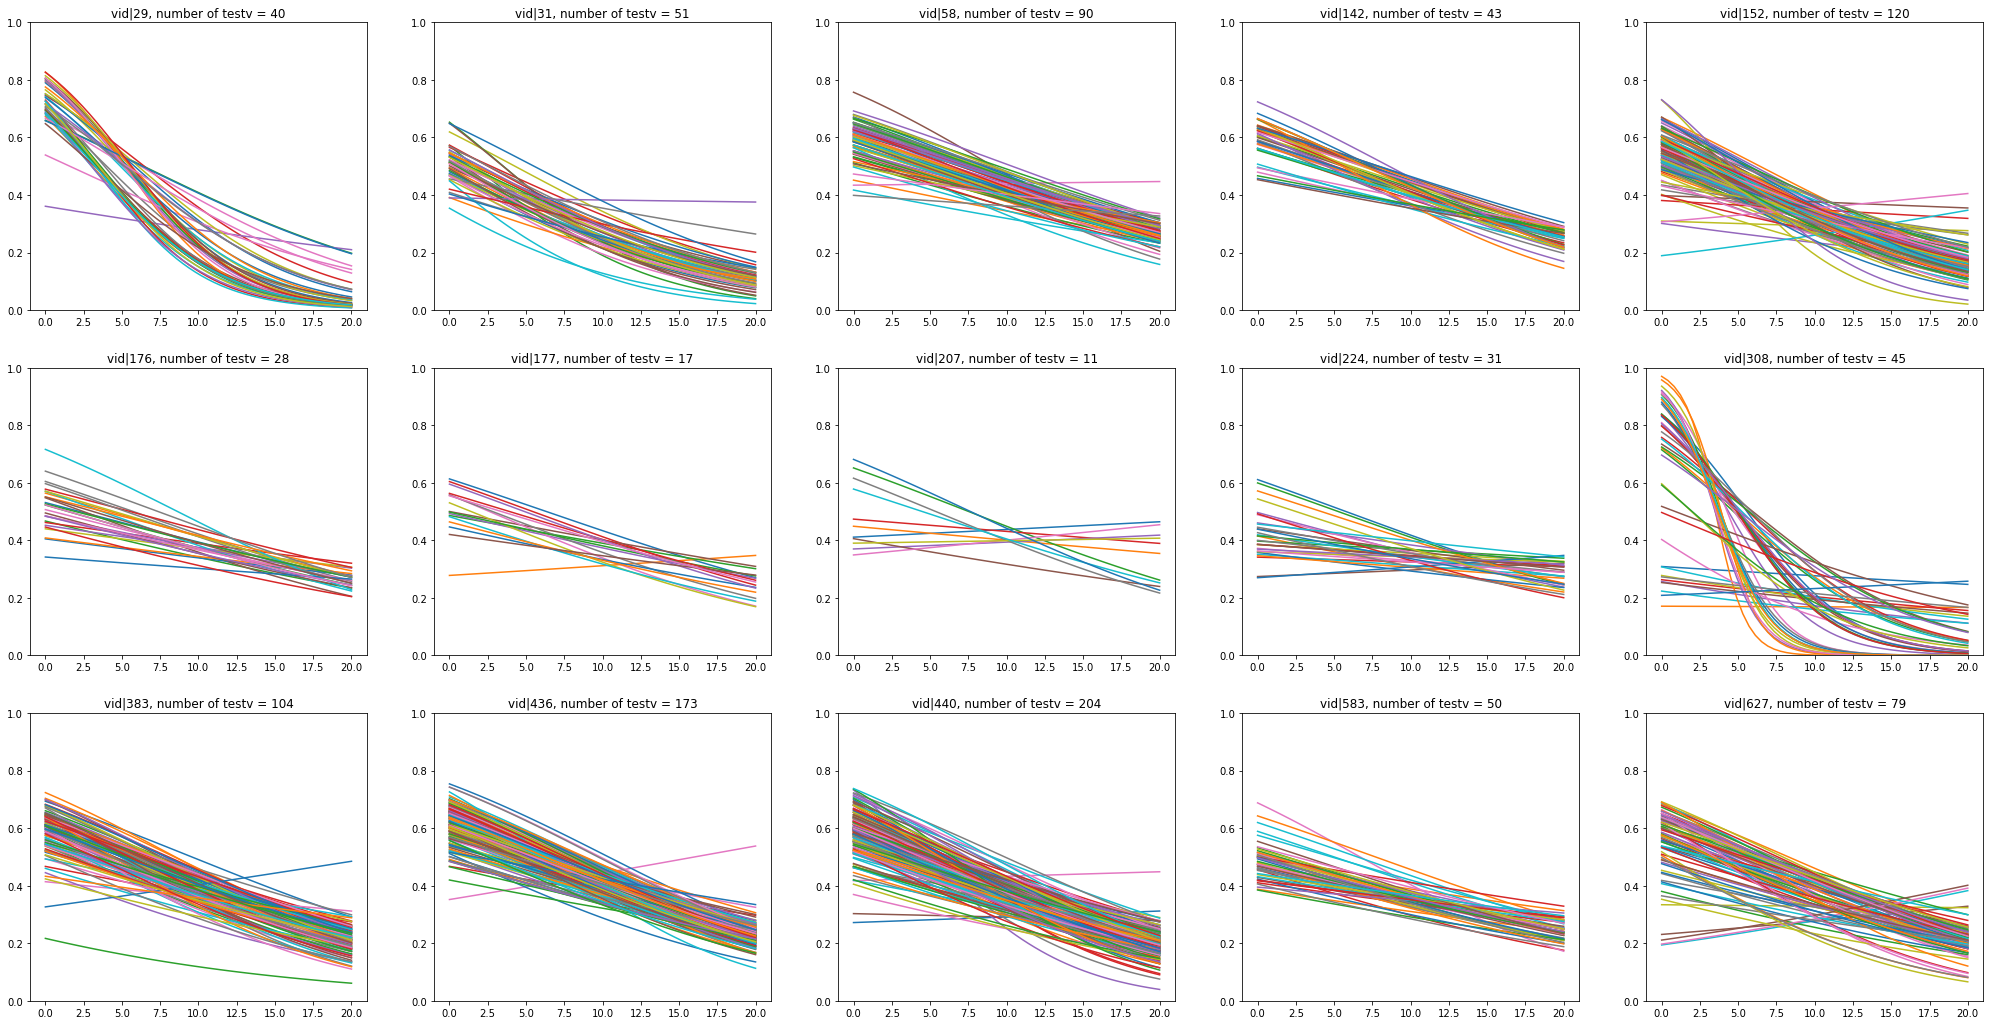

In [6]:
def combine_plots():
    # define global parameters for subplots
    layout_grids = (3, 5) # declare grids
    rows = layout_grids[0] # row number
    cols = layout_grids[1] # column number
    
    out_f = plt.figure(figsize=(35, 18))
    
    # rearrange refv by name
    refv_list = df_sub.refv.unique()
    to_int = lambda x: int(x.replace('vid|', ''))
    int_converter = np.vectorize(to_int)
    refv_list = refv_list[np.argsort(int_converter(refv_list))]
    
    # iterate over 'refv'
    for n in range(len(refv_list)):
        row_ix = int(n / 5)
        col_ix = n % 5
        axes = plt.subplot2grid(layout_grids, (row_ix, col_ix))
        logistic_by_Refv(refv_list[n], ax=axes)
    plt.show()
    #out_f.savefig("logistic_fit_by_refv.png", dpi=300)
    
combine_plots()